# Experiment: Combine Models

In this notebook, you can combine the difference models of py_wake and see the effects in terms of AEP and a flow map

## Initialization

In [1]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [2]:
# import all available models
from py_wake.deficit_models import *
from py_wake.wind_farm_models import *
from py_wake.rotor_avg_models import *
from py_wake.superposition_models import *
from py_wake.deflection_models import *
from py_wake.turbulence_models import *
from py_wake.ground_models import *

In [3]:
# Setup site, wind turbines
from py_wake.examples.data.iea37._iea37 import IEA37Site, IEA37_WindTurbines
site = IEA37Site(16)
windTurbines = IEA37_WindTurbines()
x,y = site.initial_position.T

In [4]:
# prepare for the model combination tool
from py_wake.utils.model_utils import get_models, get_signature
from ipywidgets import interact
from IPython.display import HTML, display, Javascript
import time
import matplotlib.pyplot as plt

# Fix ipywidget label width
display(HTML('''<style>.widget-label { min-width: 20ex !important; }</style>'''))


def print_signature(windFarmModel, **kwargs):
    s = """# windFarmModel autogenerated by dropdown boxes
t = time.time()
wfm = %s
sim_res = wfm(x,y)
plt.figure(figsize=(12,8))
sim_res.flow_map(wd=270).plot_wake_map()
print (wfm)
print ("Computation time (AEP + flowmap):", time.time()-t)
plt.title('AEP: %%.2fGWh'%%(sim_res.aep().sum()))
"""% get_signature(windFarmModel, kwargs, 1)
        
    # Write windFarmModel code to cell starting "# windFarmModel autogenerated by dropdown boxes"
    display(Javascript("""
for (var cell of IPython.notebook.get_cells()) {
    if (cell.get_text().startsWith("# windFarmModel autogenerated by dropdown boxes")){
        cell.set_text(`%s`);
        cell.execute();
    }
}"""%s))

# setup list of models
models = {n:[(getattr(m,'__name__',m), m) for m in get_models(cls)] 
          for n,cls in [('windFarmModel', WindFarmModel),
                        ('wake_deficitModel', WakeDeficitModel),
                        ('rotorAvgModel', RotorAvgModel),
                        ('superpositionModel', SuperpositionModel),
                        ('blockage_deficitModel', BlockageDeficitModel),
                        ('deflectionModel',DeflectionModel),
                        ('turbulenceModel', TurbulenceModel),
                        ('groundModel', GroundModel)
                        ]}

## Combine and execute model

Combine your model via the dropdown boxes below
Choosing a different model updates and executes the the code cell below which runs the wind farm model, prints the AEP and plots a flow map

In [5]:
_ = interact(print_signature, **models)

interactive(children=(Dropdown(description='windFarmModel', options=(('PropagateDownwind', <class 'py_wake.win…

PropagateDownwind(EngineeringWindFarmModel, NOJDeficit-wake, RotorCenter-rotor-average, LinearSum-superposition)
Computation time (AEP + flowmap): 0.9950721263885498


Text(0.5, 1.0, 'AEP: 355.83GWh')

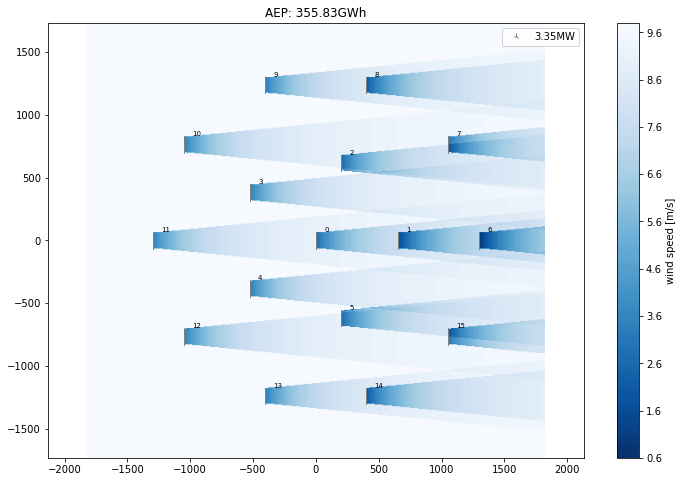

In [8]:
# windFarmModel autogenerated by dropdown boxes
t = time.time()
wfm = PropagateDownwind(
    site,
    windTurbines,
    wake_deficitModel=NOJDeficit(
        k=0.1,
        use_effective_ws=False),
    rotorAvgModel=RotorCenter(),
    superpositionModel=LinearSum(),
    deflectionModel=None,
    turbulenceModel=None,
    groundModel=NoGround())
sim_res = wfm(x,y)
plt.figure(figsize=(12,8))
sim_res.flow_map(wd=270).plot_wake_map()
print (wfm)
print ("Computation time (AEP + flowmap):", time.time()-t)
plt.title('AEP: %.2fGWh'%(sim_res.aep().sum()))
